In [190]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from numpy import genfromtxt
import seaborn as sns 

In [191]:
iris = np.genfromtxt('iris_full.csv',dtype = None, skip_header = 1,delimiter = ',')

In [192]:
iris[:5,]

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ]])

In [193]:
X = iris[:,0:4]
X[:5]
X.dtype
X.shape

(150, 4)

# Checking balanced dataset 

In [194]:
y = iris[:,4:]
print("distinct values",np.unique(y))
y = y.astype(int)
print("y == 0",len(y[y==0]))
print("y == 1",len(y[y == 1]))
print("y == 2",len(y[y == 2]))
print("The data is balanced")
len(X)

distinct values [0. 1. 2.]
y == 0 50
y == 1 50
y == 2 50
The data is balanced


150

## Visualize 2 first features

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


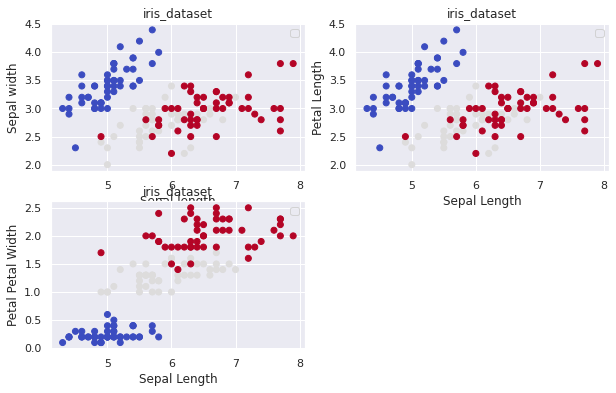

In [195]:
c = y
fig = plt.figure(figsize = (10,6))
#################
plt.subplot(2,2,1)
sns.set_theme(color_codes = True)
plt.scatter(X[:, 0], X[:, 1], cmap=plt.cm.coolwarm, c = c)
#plt.scatter(X[:, 0], X[:, 2], cmap=plt.cm.coolwarm , c = y)
#plt.scatter(X[:, 0], X[:, 3], cmap=plt.cm.coolwarm, c = y)
plt.legend()
plt.title("iris_dataset")
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
######
plt.subplot(2,2,2)
sns.set_theme(color_codes = True)
plt.scatter(X[:, 0], X[:, 1], cmap=plt.cm.coolwarm, c = y)
#plt.scatter(X[:, 0], X[:, 2], cmap=plt.cm.coolwarm , c = y)
#plt.scatter(X[:, 0], X[:, 3], cmap=plt.cm.coolwarm, c = y)
plt.legend()
plt.title("iris_dataset")
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
######
plt.subplot(2,2,3)
sns.set_theme(color_codes = True)
plt.scatter(X[:, 0], X[:, 3], cmap=plt.cm.coolwarm, c = y)
#plt.scatter(X[:, 0], X[:, 2], cmap=plt.cm.coolwarm , c = y)
#plt.scatter(X[:, 0], X[:, 3], cmap=plt.cm.coolwarm, c = y)
plt.legend()
plt.title("iris_dataset")
plt.xlabel('Sepal Length')
plt.ylabel('Petal Petal Width')

## show images 
plt.show()

## Data normalization 

In [196]:
min = np.min(X)
max = np.max(X)

X = (X - min)/(max - min)
X[:5]

array([[0.64102564, 0.43589744, 0.16666667, 0.01282051],
       [0.61538462, 0.37179487, 0.16666667, 0.01282051],
       [0.58974359, 0.3974359 , 0.15384615, 0.01282051],
       [0.57692308, 0.38461538, 0.17948718, 0.01282051],
       [0.62820513, 0.44871795, 0.16666667, 0.01282051]])

## adding bias b = 1 for matrix mutiplication 

In [197]:
intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)

# Shuffle data 

In [198]:
inds = np.arange(X.shape[0])
np.random.shuffle(inds)
X_shuffle = X[inds]
#X_shuffle = X_shuffle.T # transpose
print("X_shuffle shape",X_shuffle.shape)
y_shuffle = y[inds]

X_shuffle shape (150, 5)


In [199]:
n_samples = X.shape[0]
n_samples

150

# n_samples

## Define functions 

In [200]:
# compute forward
# define softmax function
def softmax_regression(z) : 
  z_exp = np.exp(z)
  partition = np.sum(z_exp,keepdims = True,axis = 0)
  soft_function = z_exp/partition
  return soft_function
def predict(z) : # print output and convert it into probabilities using activation function softmax
  probs = softmax_regression(z) # y_hat
  return probs

def loss_function(y,stochastic) :
  cor_logs = -np.log(probs[y,range(stochastic)])
  loss = np.sum(cor_logs)/y.size
  return loss
# using gradiennt 
def compute_loss(X,stochastic) :
  discores = probs 
  discores[y,range(stochastic)] -= 1
  dloss = np.dot(X,discores)
  return dloss
# backward chain rules 
# update weights and bias 
def update_weight(theta,dtheta,n) :
  theta -= n*dtheta   

## init parameters and hyperparameters 

In [201]:
D = 4
k = 3
theta  = np.random.randn(D+1,k)
print(theta)

[[ 1.44203188  0.29019184  1.17817205]
 [ 1.41056024 -0.14148746  1.09716374]
 [-0.06253552  0.70242286  0.15558617]
 [ 2.69497354 -1.37731343 -1.46348659]
 [ 0.65007487  0.29867131 -0.25975894]]


In [202]:
data_size = X.shape[0]
data_size 

150

In [203]:
n = 0.1 # learning rate
accs = []
losses = []
epoch_max = 100 #iteration hyperparameters 
stochastic = 1

In [204]:
for epoch in range(epoch_max): 
  for i in range(stochastic) :
    Xi = X_shuffle[i:i+1]
    Xi = Xi.T
    yi = y_shuffle[i:i+1]
    #print("n_samples",n_samples)
    #print("Xi",Xi.shape)
    #print("X_shuffle",X_shuffle.shape) 
    # define z
    z = np.dot(theta.T,Xi)    
    #print("Z",z)
    probs = predict(z)
    #print("y_hat",probs.round())
    loss = loss_function(yi,stochastic)
    losses.append(loss)
    print("Losses",losses)
    #dtheta = compute_loss(X,stochastic)
    #print("dtheta",dtheta)
    

Losses [3.677107625523139]
Losses [3.677107625523139, 3.677107625523139]
Losses [3.677107625523139, 3.677107625523139, 3.677107625523139]
Losses [3.677107625523139, 3.677107625523139, 3.677107625523139, 3.677107625523139]
Losses [3.677107625523139, 3.677107625523139, 3.677107625523139, 3.677107625523139, 3.677107625523139]
Losses [3.677107625523139, 3.677107625523139, 3.677107625523139, 3.677107625523139, 3.677107625523139, 3.677107625523139]
Losses [3.677107625523139, 3.677107625523139, 3.677107625523139, 3.677107625523139, 3.677107625523139, 3.677107625523139, 3.677107625523139]
Losses [3.677107625523139, 3.677107625523139, 3.677107625523139, 3.677107625523139, 3.677107625523139, 3.677107625523139, 3.677107625523139, 3.677107625523139]
Losses [3.677107625523139, 3.677107625523139, 3.677107625523139, 3.677107625523139, 3.677107625523139, 3.677107625523139, 3.677107625523139, 3.677107625523139, 3.677107625523139]
Losses [3.677107625523139, 3.677107625523139, 3.677107625523139, 3.677107

## Plot losses 

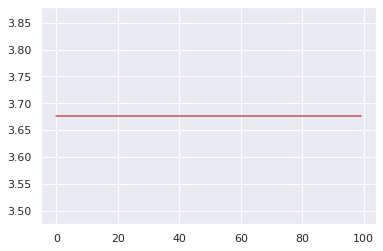

In [205]:
axis = range(len(losses))
plt.plot(axis,losses,label = 'losses', color = 'r')
plt.show()

In [206]:
predicted_class = np.argmax(z, axis=0)
print('Training accuracy: %.2f' % (np.mean(predicted_class == y)))

Training accuracy: 0.33
